<a href="https://colab.research.google.com/github/lOmarMisbahl/PatternRecognition-Sheets/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.metrics.pairwise import rbf_kernel as rbf
from sklearn.neighbors import NearestNeighbors as nn
from scipy.sparse.linalg import eigs as sciEigs

In [ ]:
Data = np.array([[2,4],[3,3],[3,4],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],[7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],[11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])

In [ ]:
def NormalizedCut(Data, NumOfClusters, Mode, Gamma=1.0, NumOfNeighbors=1):
    if(Mode == 'rbf'):
        similarityMatrix = rbf(Data,Data,Gamma)
    elif(Mode == 'knn'):
        nearest_neigbhor = nn(n_neighbors=NumOfNeighbors)
        nearest_neigbhor.fit(Data)
        similarityMatrix = nearest_neigbhor.kneighbors_graph(Data, mode='connectivity').toarray()
        
    degreeMmatrix = np.diag(np.sum(similarityMatrix, axis=1))
    laplacianMatrix = degreeMmatrix - similarityMatrix
    nomalizedAsymmertircLaplacianMatrix = np.dot(np.linalg.pinv(degreeMmatrix),laplacianMatrix) 
    values,vectors = np.linalg.eig(nomalizedAsymmertircLaplacianMatrix)
    idx = np.real(values).argsort()[:NumOfClusters]
    vectors = np.real(vectors[:,idx])
    Normalization = np.linalg.norm(vectors, axis=1)
    NormalizedVectors = (vectors.T / Normalization).T
    return NormalizedVectors,np.real(values)

In [ ]:
def KMeans(Data, NumOfClusters):
    NumberOfData = Data.shape[0]
    NumberOfFeatures = Data.shape[1]
    Centroids = np.random.randn(NumOfClusters,NumberOfFeatures) 
    Clusters = np.zeros(NumOfClusters)
    Distances = np.zeros((NumberOfData,NumOfClusters))
    for i in range(NumOfClusters):
        Distances[:,i] = np.linalg.norm(Data - Centroids[i], axis=1)
        Clusters = np.argmin(Distances, axis = 1)
        for i in range(NumOfClusters):
            Centroids[i] = np.mean(Data[Clusters == i], axis=0)
        
    return Centroids,Clusters

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


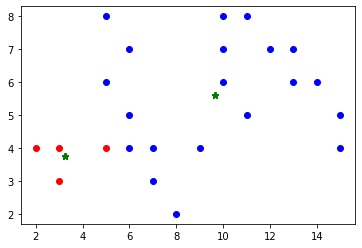

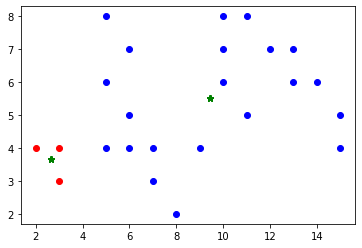

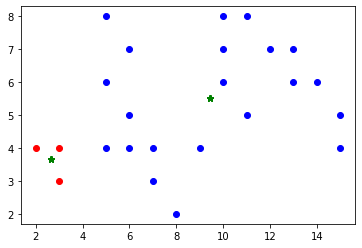

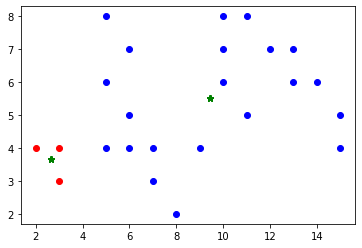

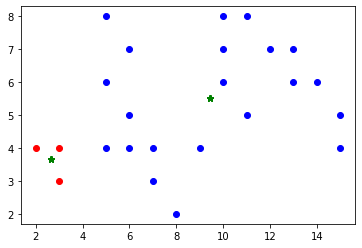

<Figure size 432x288 with 0 Axes>

In [ ]:
colors=['red', 'blue', 'green','black','yellow','gray']
KMeans_Clusters = []
for K in range(2,7):
    Centroids,Clusters = KMeans(Data,K)
    KMeans_Clusters.append(Clusters)
    for i in range(Data.shape[0]):
        plt.scatter(Data[i, 0], Data[i,1],color = colors[Clusters[i]]);
        plt.scatter(Centroids[:,0], Centroids[:,1], marker='*', c='g');
    plt.figure();

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: Runti

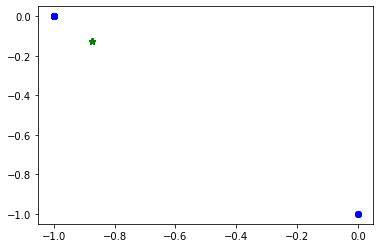

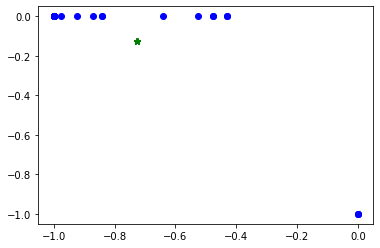

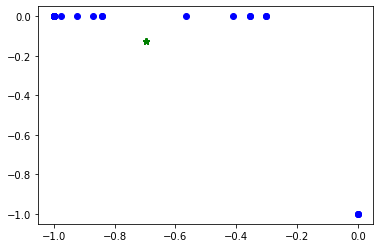

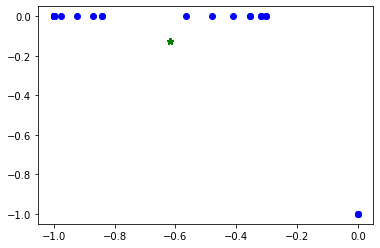

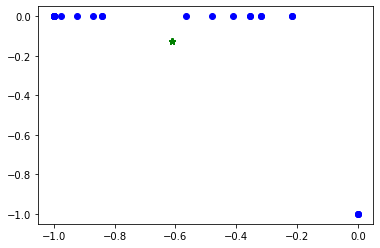

<Figure size 432x288 with 0 Axes>

In [ ]:
Colors=['red', 'blue', 'green','black','yellow','gray']
KNN3_Clusters = []
for K in range(2,7):
    Y,values = NormalizedCut(Data, NumOfClusters=K, Mode='knn',NumOfNeighbors=3)
    Centroids,Clusters = KMeans(Y,K)
    KNN3_Clusters.append(Clusters)
    for i in range(Y.shape[0]):
        plt.scatter(Y[i, 0], Y[i,1],color = Colors[Clusters[i]]);
        plt.scatter(Centroids[:,0], Centroids[:,1], marker='*', c='g');
    plt.figure();

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: Runti

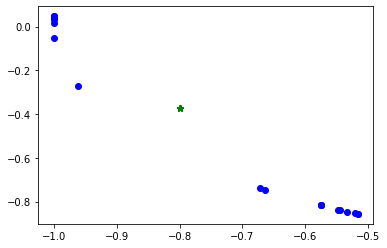

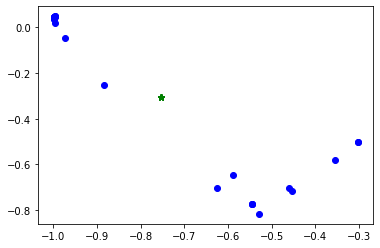

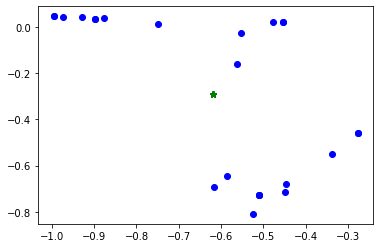

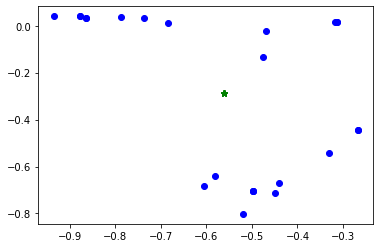

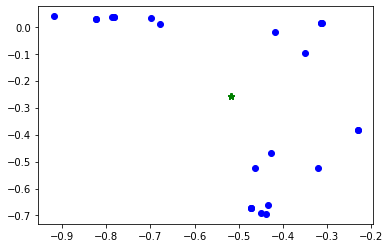

<Figure size 432x288 with 0 Axes>

In [ ]:
Colors=['red', 'blue', 'green','black','yellow','gray']
KNN5_Clusters = []
for K in range(2,7):
    Y,values = NormalizedCut(Data, NumOfClusters=K, Mode='knn',NumOfNeighbors=5)
    Centroids,Clusters = KMeans(Y,K)
    KNN5_Clusters.append(Clusters)
    for i in range(Y.shape[0]):
        plt.scatter(Y[i, 0], Y[i,1],color = Colors[Clusters[i]]);
        plt.scatter(Centroids[:,0], Centroids[:,1], marker='*', c='g');
    plt.figure();

In [ ]:
def FMeasure(Clusters,Variables):
    FMeasure = 0
    ContingencyTable =contingency_matrix(Clusters,Variables)
    for i in range(ContingencyTable.shape[0]):
        SummationOverColumns = 0
        Precision = ContingencyTable.max(axis=1)[i] / np.sum(ContingencyTable[i])
        MaximumPosition = ContingencyTable.argmax(axis=1)[i]
        for j in range(ContingencyTable.shape[0]):
         SummationOverColumns += ContingencyTable[j][MaximumPosition]
        Recall = ContingencyTable.max(axis=1)[i] / SummationOverColumns
        FMeasure += 2*Precision*Recall / (Precision+Recall)
    return FMeasure/ContingencyTable.shape[0]

In [ ]:
def ConditionalEntropy(Clusters,Variables):
    ContingencyTable = contingency_matrix(Clusters, Variables)      
    ConditionalEntropies = []
    for i in range(ContingencyTable.shape[0]):
        ConditionalEntropy = 0
        NumberOfElementsInCluster = np.sum(ContingencyTable[i])
        for j in range(ContingencyTable.shape[1]):
            if(ContingencyTable[i][j] != 0): ConditionalEntropy -= (ContingencyTable[i][j]/NumberOfElementsInCluster) * (np.log2(ContingencyTable[i][j]/NumberOfElementsInCluster))
        ConditionalEntropies.append(ConditionalEntropy*NumberOfElementsInCluster) 
    return sum(ConditionalEntropies)/np.sum(ContingencyTable)